<h2> Part 2 : Clean the dataframe. </h2>

- Examine the present columns -> decide on more useful columns or atomic features of interest.

- Create columns for the following...

    1. auction_year : Just the year of the auction
    2. listed_currency : The original listings currency
    3. estimate_high : High auction sale estimate
    4. estimate_low : Low auction sale estimate

- For each column with currency, convert the currency to USD and adjust for inflation.

- At the bottom of this notebook -> comment on future directions with this polished dataframe.

In [1]:
#!pip install easymoney

In [2]:
import pickle
import numpy as np
import pandas as pd
import os
from easymoney.money import EasyPeasy


In [3]:
os.getcwd()

'C:\\Users\\cltng'

In [4]:
with open(os.getcwd()+'/ALL_WATCHES.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

In [5]:
content

,author,title,publisher,remainder,remainder2,realised_price,estimated_price,date_of_auction,Lot_description,auction_title,image_url,sale_reference,lot_number,url_link
0,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,"HKD 35,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4601,https://www.christies.com/lotfinder/watches/ro...
1,ROLEX,A STAINLESS STEEL AUTOMATIC ANTI-MAGNETIC WRI...,,,,"HKD 50,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC ANTI-MAGNE...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4602,https://www.christies.com/lotfinder/watches/ro...
2,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,"HKD 40,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4603,https://www.christies.com/lotfinder/watches/ro...
3,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,"HKD 62,500","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4604,https://www.christies.com/lotfinder/watches/ro...
4,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,"HKD 35,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4605,https://www.christies.com/lotfinder/watches/ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,Patek Philippe,"An Extremely Fine, Rare and Attractive Stainl...",,,,"USD 423,000","USD 350,000 - USD 550,000",6 June 2019,"[Patek Philippe. An Extremely Fine, Rare and A...",An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,92,https://www.christies.com/lotfinder/watches/pa...
3625,Patek Philippe,A Very Fine and Rare 18k White Gold Automatic...,,,,"USD 1,155,000","USD 300,000 - USD 500,000",6 June 2019,[Patek Philippe. A Very Fine and Rare 18k Whit...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,94,https://www.christies.com/lotfinder/watches/pa...
3626,Patek Philippe,A Rare and Historically Important Platinum an...,,,,"USD 15,000","USD 10,000 - USD 20,000",6 June 2019,[Patek Philippe. A Rare and Historically Impor...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,95,https://www.christies.com/lotfinder/watches/pa...
3627,Patek Philippe,A Fine 18k White Gold Wristwatch with Center ...,,,,"USD 25,000","USD 20,000 - USD 30,000",6 June 2019,[Patek Philippe. A Fine 18k White Gold Wristwa...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,97,https://www.christies.com/lotfinder/watches/pa...


<h4> Split the esimated_price column into 2 columns for low and high values. Add a column with just year of auction. Add column with auction's listed currency. </h4>

In [6]:
estimate_low = []
estimate_high = []
for i in content.estimated_price:
    low_est, hi_est = i.split(' - ')
    estimate_low.append(low_est)
    estimate_high.append(hi_est)

assert(len(estimate_low) == len(estimate_high)), 'Error in low/high estimate column pre-processing'

#add the new columns to main dataframe
content['estimate_low'] = estimate_low
content['estimate_high'] = estimate_high

In [7]:
years_only = []
for i in content.date_of_auction:
    years_only.append(i.split(' ')[2])
    
content['auction_year'] = years_only

In [76]:
mo_only = []
for i in content.date_of_auction:
    mo_only.append(i.split(' ')[1])
    
content['auction_month'] = mo_only

In [8]:
auctionlist_currency = []
for i in content.estimated_price:
    og_currency = i.split(' ')[0]
    auctionlist_currency.append(og_currency)
    
content['listed_currency'] = auctionlist_currency

In [9]:
content

,author,title,publisher,remainder,remainder2,realised_price,estimated_price,date_of_auction,Lot_description,auction_title,image_url,sale_reference,lot_number,url_link,estimate_low,estimate_high,auction_year,listed_currency
0,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,"HKD 35,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4601,https://www.christies.com/lotfinder/watches/ro...,"HKD 24,000","HKD 40,000",2012,HKD
1,ROLEX,A STAINLESS STEEL AUTOMATIC ANTI-MAGNETIC WRI...,,,,"HKD 50,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC ANTI-MAGNE...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4602,https://www.christies.com/lotfinder/watches/ro...,"HKD 24,000","HKD 40,000",2012,HKD
2,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,"HKD 40,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4603,https://www.christies.com/lotfinder/watches/ro...,"HKD 24,000","HKD 40,000",2012,HKD
3,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,"HKD 62,500","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4604,https://www.christies.com/lotfinder/watches/ro...,"HKD 24,000","HKD 40,000",2012,HKD
4,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,"HKD 35,000","HKD 24,000 - HKD 40,000",30 May 2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4605,https://www.christies.com/lotfinder/watches/ro...,"HKD 24,000","HKD 40,000",2012,HKD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,Patek Philippe,"An Extremely Fine, Rare and Attractive Stainl...",,,,"USD 423,000","USD 350,000 - USD 550,000",6 June 2019,"[Patek Philippe. An Extremely Fine, Rare and A...",An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,92,https://www.christies.com/lotfinder/watches/pa...,"USD 350,000","USD 550,000",2019,USD
3625,Patek Philippe,A Very Fine and Rare 18k White Gold Automatic...,,,,"USD 1,155,000","USD 300,000 - USD 500,000",6 June 2019,[Patek Philippe. A Very Fine and Rare 18k Whit...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,94,https://www.christies.com/lotfinder/watches/pa...,"USD 300,000","USD 500,000",2019,USD
3626,Patek Philippe,A Rare and Historically Important Platinum an...,,,,"USD 15,000","USD 10,000 - USD 20,000",6 June 2019,[Patek Philippe. A Rare and Historically Impor...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,95,https://www.christies.com/lotfinder/watches/pa...,"USD 10,000","USD 20,000",2019,USD
3627,Patek Philippe,A Fine 18k White Gold Wristwatch with Center ...,,,,"USD 25,000","USD 20,000 - USD 30,000",6 June 2019,[Patek Philippe. A Fine 18k White Gold Wristwa...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,97,https://www.christies.com/lotfinder/watches/pa...,"USD 20,000","USD 30,000",2019,USD


In [10]:
ep = EasyPeasy()

In [ ]:
#ep.options()

In [12]:
# Move the low estimate into its own column.
cols = content.columns.tolist()
column_to_move = "estimate_low"
new_position = 7
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
content = content[cols]

In [13]:
# Move the high estimate into its own column.
cols = content.columns.tolist()
column_to_move = "estimate_high"
new_position = 8
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
content = content[cols]

In [14]:
# Make column with just the year. To make things easier later on.
cols = content.columns.tolist()
column_to_move = "auction_year"
new_position = 10
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
content = content[cols]

In [15]:
# Make column with the listed currency- this information could be interesting.
cols = content.columns.tolist()
column_to_move = "listed_currency"
new_position = 5
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
content = content[cols]

In [16]:
content

,author,title,publisher,remainder,remainder2,listed_currency,realised_price,estimated_price,estimate_low,estimate_high,date_of_auction,auction_year,Lot_description,auction_title,image_url,sale_reference,lot_number,url_link
0,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,HKD,"HKD 35,000","HKD 24,000 - HKD 40,000","HKD 24,000","HKD 40,000",30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4601,https://www.christies.com/lotfinder/watches/ro...
1,ROLEX,A STAINLESS STEEL AUTOMATIC ANTI-MAGNETIC WRI...,,,,HKD,"HKD 50,000","HKD 24,000 - HKD 40,000","HKD 24,000","HKD 40,000",30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC ANTI-MAGNE...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4602,https://www.christies.com/lotfinder/watches/ro...
2,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,HKD,"HKD 40,000","HKD 24,000 - HKD 40,000","HKD 24,000","HKD 40,000",30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4603,https://www.christies.com/lotfinder/watches/ro...
3,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,HKD,"HKD 62,500","HKD 24,000 - HKD 40,000","HKD 24,000","HKD 40,000",30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4604,https://www.christies.com/lotfinder/watches/ro...
4,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,HKD,"HKD 35,000","HKD 24,000 - HKD 40,000","HKD 24,000","HKD 40,000",30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4605,https://www.christies.com/lotfinder/watches/ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,Patek Philippe,"An Extremely Fine, Rare and Attractive Stainl...",,,,USD,"USD 423,000","USD 350,000 - USD 550,000","USD 350,000","USD 550,000",6 June 2019,2019,"[Patek Philippe. An Extremely Fine, Rare and A...",An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,92,https://www.christies.com/lotfinder/watches/pa...
3625,Patek Philippe,A Very Fine and Rare 18k White Gold Automatic...,,,,USD,"USD 1,155,000","USD 300,000 - USD 500,000","USD 300,000","USD 500,000",6 June 2019,2019,[Patek Philippe. A Very Fine and Rare 18k Whit...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,94,https://www.christies.com/lotfinder/watches/pa...
3626,Patek Philippe,A Rare and Historically Important Platinum an...,,,,USD,"USD 15,000","USD 10,000 - USD 20,000","USD 10,000","USD 20,000",6 June 2019,2019,[Patek Philippe. A Rare and Historically Impor...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,95,https://www.christies.com/lotfinder/watches/pa...
3627,Patek Philippe,A Fine 18k White Gold Wristwatch with Center ...,,,,USD,"USD 25,000","USD 20,000 - USD 30,000","USD 20,000","USD 30,000",6 June 2019,2019,[Patek Philippe. A Fine 18k White Gold Wristwa...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,97,https://www.christies.com/lotfinder/watches/pa...


In [17]:
len(years_only)

3629

<h4> Use the easymoney library to convert currency and adjust for inflation. </h4>

<h4> Pandas has an apply method to create new columns based on existing columns. </h4>

In [18]:
def adjust_currency(amount, original_currency):
    #direct conversion
    #print(amount)
    amount = str(amount)
    #print(len(amount))
    amount = amount.split(' ')[1]
    #remove comma from value
    amount = amount.replace(',','')
    direct_con = ep.currency_converter(amount=int(amount), from_currency=original_currency, to_currency="USD", pretty_print=False)
    #inflated conversion
    inflate_con = ep.normalize(amount=direct_con, region="USA", from_year=2010, to_year="latest", pretty_print=False)
    return inflate_con

In [19]:
adjust_currency('HKD 5000','HKD')

665.56

<h4> I realize that some auctions did not sell and therefore do not have realised prices. Listed currency is empty as well because realised price was used to pull the currency. I went back to edit the script which creates the 'listed_currency' column</h4>

In [20]:
def adjust_currency(amount, original_currency):
    #direct conversion
    #print(amount)
    #Check if amount is not empty, if data present, perform adjustment. Otherwise, return empty string
    if amount:
        amount = amount.split(' ')[1]
        #remove comma from value
        amount = amount.replace(',','')
        direct_con = ep.currency_converter(amount=int(amount), from_currency=original_currency, to_currency="USD", pretty_print=False)
        #inflated conversion
        inflate_con = ep.normalize(amount=direct_con, region="USA", from_year=2010, to_year="latest", pretty_print=False)
        return inflate_con
    else:
        return ''
    

In [21]:
content['realised_price'] = content.apply(lambda row: adjust_currency(row['realised_price'], row['listed_currency']), axis=1)

In [22]:
content['estimate_low'] = content.apply(lambda row: adjust_currency(row['estimate_low'], row['listed_currency']), axis=1)

In [23]:
content['estimate_high'] = content.apply(lambda row: adjust_currency(row['estimate_high'], row['listed_currency']), axis=1)

In [24]:
content

,author,title,publisher,remainder,remainder2,listed_currency,realised_price,estimated_price,estimate_low,estimate_high,date_of_auction,auction_year,Lot_description,auction_title,image_url,sale_reference,lot_number,url_link
0,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,HKD,4658.94,"HKD 24,000 - HKD 40,000",3194.70,5324.52,30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4601,https://www.christies.com/lotfinder/watches/ro...
1,ROLEX,A STAINLESS STEEL AUTOMATIC ANTI-MAGNETIC WRI...,,,,HKD,6655.65,"HKD 24,000 - HKD 40,000",3194.70,5324.52,30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC ANTI-MAGNE...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4602,https://www.christies.com/lotfinder/watches/ro...
2,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,HKD,5324.52,"HKD 24,000 - HKD 40,000",3194.70,5324.52,30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4603,https://www.christies.com/lotfinder/watches/ro...
3,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,HKD,8319.55,"HKD 24,000 - HKD 40,000",3194.70,5324.52,30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4604,https://www.christies.com/lotfinder/watches/ro...
4,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,HKD,4658.94,"HKD 24,000 - HKD 40,000",3194.70,5324.52,30 May 2012,2012,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4605,https://www.christies.com/lotfinder/watches/ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,Patek Philippe,"An Extremely Fine, Rare and Attractive Stainl...",,,,USD,438961,"USD 350,000 - USD 550,000",363206.78,570753.51,6 June 2019,2019,"[Patek Philippe. An Extremely Fine, Rare and A...",An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,92,https://www.christies.com/lotfinder/watches/pa...
3625,Patek Philippe,A Very Fine and Rare 18k White Gold Automatic...,,,,USD,1.19858e+06,"USD 300,000 - USD 500,000",311320.10,518866.83,6 June 2019,2019,[Patek Philippe. A Very Fine and Rare 18k Whit...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,94,https://www.christies.com/lotfinder/watches/pa...
3626,Patek Philippe,A Rare and Historically Important Platinum an...,,,,USD,15566,"USD 10,000 - USD 20,000",10377.34,20754.67,6 June 2019,2019,[Patek Philippe. A Rare and Historically Impor...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,95,https://www.christies.com/lotfinder/watches/pa...
3627,Patek Philippe,A Fine 18k White Gold Wristwatch with Center ...,,,,USD,25943.3,"USD 20,000 - USD 30,000",20754.67,31132.01,6 June 2019,2019,[Patek Philippe. A Fine 18k White Gold Wristwa...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,97,https://www.christies.com/lotfinder/watches/pa...


<h2> Ideas about future analysis and data cleaning </h2>

<h4> Now that this dataframe is relatively polished there are a few more factors to consider. This dataset has not been completely cleaned; there are still some jewelery like necklaces, bracelets and earrings. These objects are likely included due to being part of an auction with 'watch' in the title of the auction.

We can now facet/subset the data based on the listed currency. Perhaps auctions listed in a certain currency are more likely to sell at or above the high estimate for auction sale? In a similar vein, we can also subset the auctions based on year.
    
We can create a word cloud for the object descriptions to see the most common features in the listed objects.
    
We can move on to image analysis and add a column for auction listings which contain an image with the standard perspective of a timepiece - a white background with the forward facing watch.
    
And much more, including overall visualization and in-depth Exploratory Data Analysis.
    
</h4>


In [25]:
pd.set_option("display.precision", 2)

In [26]:
content.describe()

,estimate_low,estimate_high
count,3.63e+03,3.63e+03
mean,2.77e+04,4.41e+04
std,6.17e+04,1.04e+05
min,5.19e+02,6.76e+02
25%,4.15e+03,6.23e+03
50%,1.04e+04,1.56e+04
75%,2.59e+04,3.73e+04
max,1.04e+06,2.08e+06


In [27]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3629 entries, 0 to 3628
Data columns (total 18 columns):
author             3629 non-null object
title              3629 non-null object
publisher          3629 non-null object
remainder          3629 non-null object
remainder2         3629 non-null object
listed_currency    3629 non-null object
realised_price     3629 non-null object
estimated_price    3629 non-null object
estimate_low       3629 non-null float64
estimate_high      3629 non-null float64
date_of_auction    3629 non-null object
auction_year       3629 non-null object
Lot_description    3629 non-null object
auction_title      3629 non-null object
image_url          3629 non-null object
sale_reference     3629 non-null object
lot_number         3629 non-null object
url_link           3629 non-null object
dtypes: float64(2), object(16)
memory usage: 538.7+ KB


#### Convert the money columns to integers - pandas converts floats to scientific notation

In [28]:
content['estimate_low'] = content['estimate_low'].astype('int64')
content['estimate_high'] = content['estimate_high'].astype('int64')
content['auction_year'] = content['auction_year'].astype('int64')
#content['realsied_price'] = content['realised_price'].astype('int64')

In [29]:
#NOTE : I had issues with the realised price column due to empty values. I initially converted them to NaN which caused all calculations with this column to remain integers which caused rounding issues.
#          for example, the ratio of realised_price and high_es
content['realised_price'].replace(r'^\s*$', 0, regex=True, inplace = True)

# TODO : something better than replacing missing with 0?

In [30]:
content.loc[:, 'realised_price'] = content.realised_price.astype('int64')

In [31]:

def get_value_ratio(realised,estimate):
    if realised == '':
        return ''
    else:
        return (realised/estimate)

content['valueratio_high'] = content.apply(lambda row: get_value_ratio(row['realised_price'],row['estimate_high']), axis=1)
content['valueratio_low'] = content.apply(lambda row: get_value_ratio(row['realised_price'],row['estimate_low']), axis=1)

In [87]:
# Items above 100,000 can be called easier later

content['UltraHighEnd'] = (content['estimate_low'] > 100000).astype('int')

In [33]:
content['url_link'][2]

'https://www.christies.com/lotfinder/watches/rolex-a-stainless-steel-automatic-wristwatch-with-5572717-details.aspx?from=salesummery&intobjectid=5572717&sid=09947757-5cad-4070-a761-7fca8ac8152f'

## Exploratory Data Analysis

In [49]:
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

In [58]:
plotnine.options.figure_size = (12,12)


In [62]:
content['listed_currency'].value_counts()

USD    1879
HKD    1281
GBP     370
CHF      99
Name: listed_currency, dtype: int64

In [65]:
pd.crosstab(content['listed_currency'], content['auction_year'], margins=True, normalize=True)

auction_year,2012,2013,2014,2015,2016,2017,2018,2019,All
listed_currency,,,,,,,,,
CHF,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.03
GBP,0.00,0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.10
HKD,0.14,0.00,0.14,0.00,0.00,0.00,0.08,0.00,0.35
USD,0.00,0.01,0.12,0.09,0.16,0.02,0.06,0.05,0.52
All,0.14,0.03,0.26,0.14,0.21,0.04,0.13,0.05,1.00


In [66]:
pd.crosstab(content['listed_currency'], content['auction_year'], margins=True)

auction_year,2012,2013,2014,2015,2016,2017,2018,2019,All
listed_currency,,,,,,,,,
CHF,0,50,0,0,0,49,0,0,99
GBP,0,0,0,196,174,0,0,0,370
HKD,492,0,511,0,0,0,278,0,1281
USD,0,46,442,311,592,85,206,197,1879
All,492,96,953,507,766,134,484,197,3629


C:\Users\cltng\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


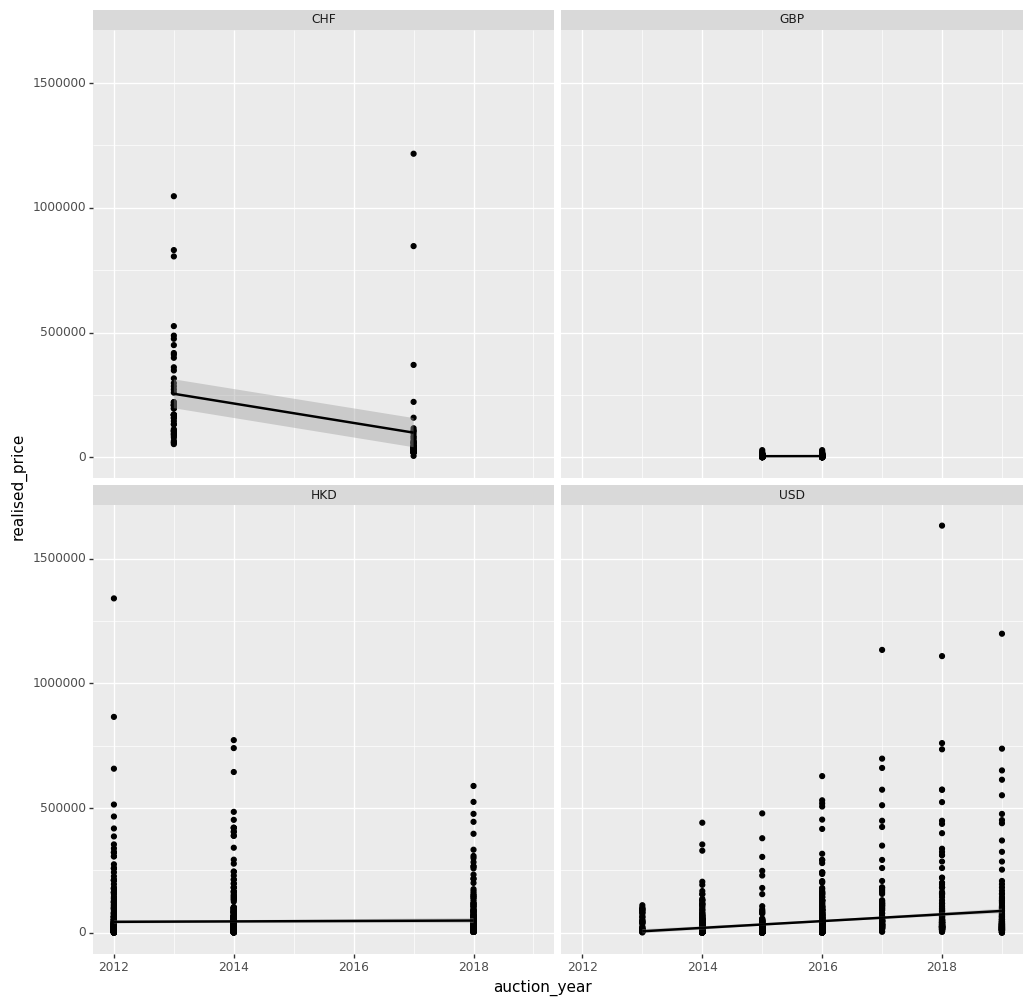

<ggplot: (-9223371919300502612)>

In [60]:
(ggplot(content, aes('auction_year','realised_price'))
       + geom_point()
       + facet_wrap('~listed_currency')
        + stat_smooth(method='lm'))

# This graph is mostly to show the trends of price listings in HKD and USD since they have most datapoints.
# We learn that listings in HKD have generally remained constant whereas listings in USD have increased in value over time and there is more variance as time goes on.


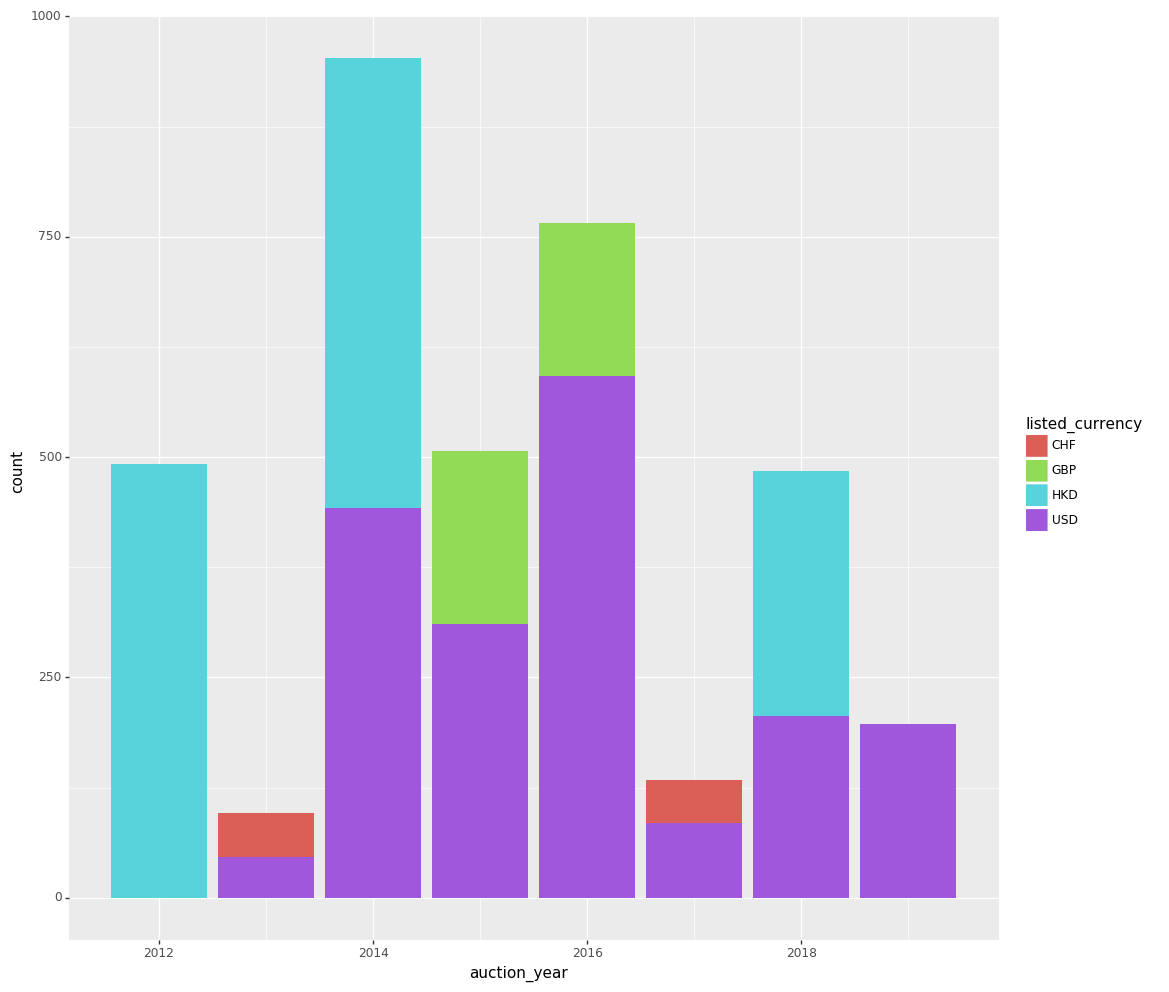

<ggplot: (-9223371919299746736)>

In [73]:
ggplot(content) + plotnine.geom_bar(aes(x='auction_year', fill='listed_currency'))
# This plot shows us how many listings were created per year as well as the listing price.
# Not every currency is represented in every year.

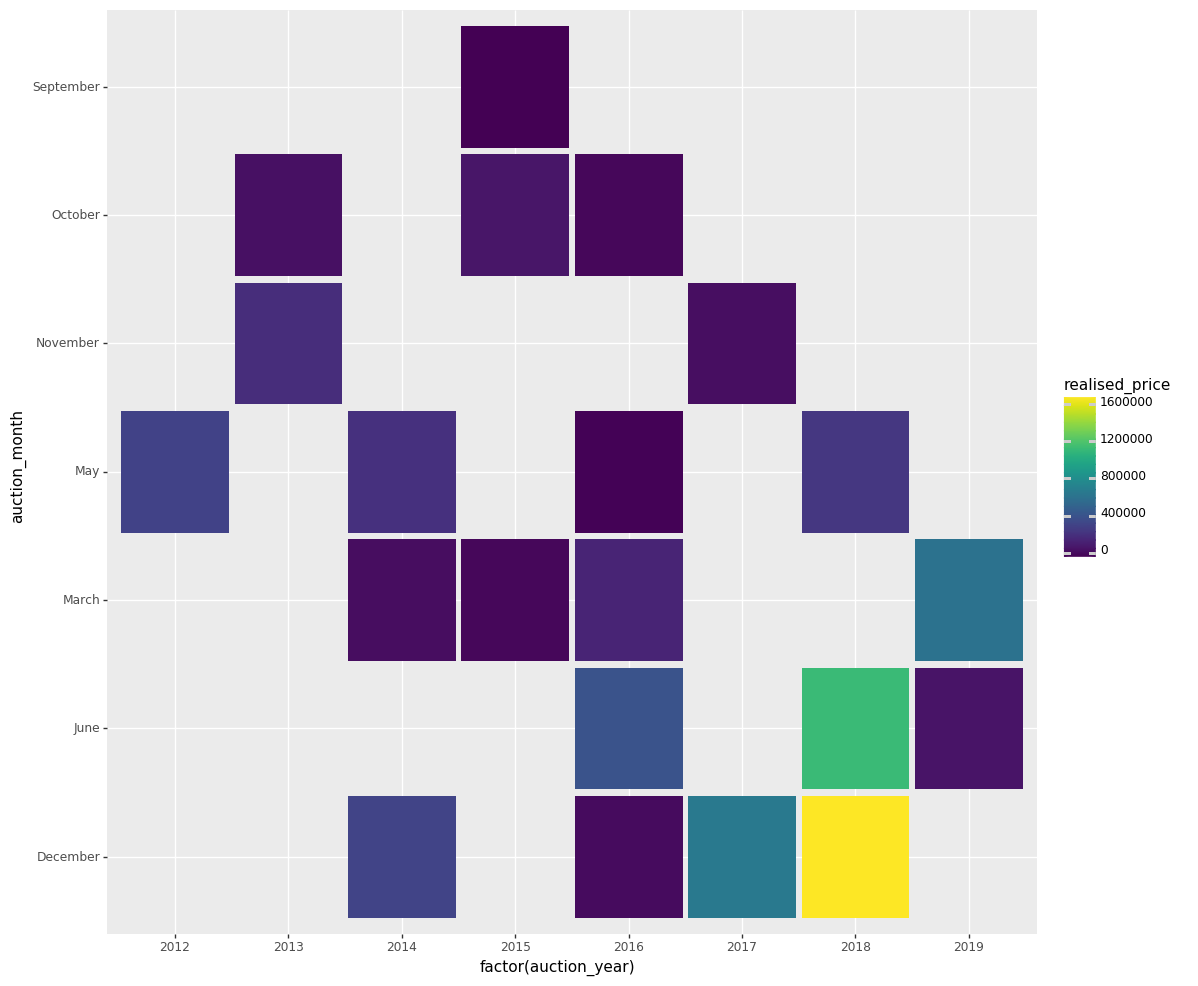

<ggplot: (-9223371919299660784)>

In [79]:
(ggplot(content, aes('factor(auction_year)', 'auction_month', fill='realised_price'))
 + plotnine.geom_tile(aes(width=.95, height=.95)))

In [ ]:
#TODO make this show average values

In [90]:
# as expected, the above plot is showing the last entry's realsied price in each year/month
content[(content['auction_year']==2018) & (content['auction_month'] == 'December')]['realised_price'].max()

1631836

In [93]:
columns_to_show = ['auction_month', 'auction_year']

content.groupby(['realised_price'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

auction_year                  
                       mean   std  amin  amax
realised_price                               
0                    2015.0  0.00  2015  2015
254                  2016.0   NaN  2016  2016
338                  2015.6  0.55  2015  2016
422                  2016.0  0.00  2016  2016
454                  2014.0   NaN  2014  2014
...                     ...   ...   ...   ...
1133724              2017.0   NaN  2017  2017
1198582              2019.0   NaN  2019  2019
1216860              2017.0   NaN  2017  2017
1340180              2012.0   NaN  2012  2012
1631836              2018.0   NaN  2018  2018

[478 rows x 4 columns]

In [96]:
pd.crosstab(content['auction_month'], content['auction_year']) 

auction_year,2012,2013,2014,2015,2016,2017,2018,2019
auction_month,,,,,,,,
December,0,0,324,0,195,85,126,0
June,0,0,0,0,136,0,80,75
March,0,0,118,172,142,0,0,122
May,492,0,511,0,174,0,278,0
November,0,50,0,0,0,49,0,0
October,0,46,0,330,119,0,0,0
September,0,0,0,5,0,0,0,0


In [97]:
content

,author,title,publisher,remainder,remainder2,listed_currency,realised_price,estimated_price,estimate_low,estimate_high,...,Lot_description,auction_title,image_url,sale_reference,lot_number,url_link,valueratio_high,valueratio_low,auction_month,UltraHighEnd
0,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,HKD,4658,"HKD 24,000 - HKD 40,000",3194,5324,...,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4601,https://www.christies.com/lotfinder/watches/ro...,0.87,1.46,May,0
1,ROLEX,A STAINLESS STEEL AUTOMATIC ANTI-MAGNETIC WRI...,,,,HKD,6655,"HKD 24,000 - HKD 40,000",3194,5324,...,[ROLEX. A STAINLESS STEEL AUTOMATIC ANTI-MAGNE...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4602,https://www.christies.com/lotfinder/watches/ro...,1.25,2.08,May,0
2,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,HKD,5324,"HKD 24,000 - HKD 40,000",3194,5324,...,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4603,https://www.christies.com/lotfinder/watches/ro...,1.00,1.67,May,0
3,ROLEX,A STAINLESS STEEL AUTOMATIC DUAL TIME WRISTWA...,,,,HKD,8319,"HKD 24,000 - HKD 40,000",3194,5324,...,[ROLEX. A STAINLESS STEEL AUTOMATIC DUAL TIME ...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4604,https://www.christies.com/lotfinder/watches/ro...,1.56,2.60,May,0
4,ROLEX,A STAINLESS STEEL AUTOMATIC WRISTWATCH WITH S...,,,,HKD,4658,"HKD 24,000 - HKD 40,000",3194,5324,...,[ROLEX. A STAINLESS STEEL AUTOMATIC WRISTWATCH...,Important Watches,[[https://www.christies.com/img/LotImages/2012...,2919,4605,https://www.christies.com/lotfinder/watches/ro...,0.87,1.46,May,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,Patek Philippe,"An Extremely Fine, Rare and Attractive Stainl...",,,,USD,438961,"USD 350,000 - USD 550,000",363206,570753,...,"[Patek Philippe. An Extremely Fine, Rare and A...",An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,92,https://www.christies.com/lotfinder/watches/pa...,0.77,1.21,June,1
3625,Patek Philippe,A Very Fine and Rare 18k White Gold Automatic...,,,,USD,1198582,"USD 300,000 - USD 500,000",311320,518866,...,[Patek Philippe. A Very Fine and Rare 18k Whit...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,94,https://www.christies.com/lotfinder/watches/pa...,2.31,3.85,June,1
3626,Patek Philippe,A Rare and Historically Important Platinum an...,,,,USD,15566,"USD 10,000 - USD 20,000",10377,20754,...,[Patek Philippe. A Rare and Historically Impor...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,95,https://www.christies.com/lotfinder/watches/pa...,0.75,1.50,June,0
3627,Patek Philippe,A Fine 18k White Gold Wristwatch with Center ...,,,,USD,25943,"USD 20,000 - USD 30,000",20754,31132,...,[Patek Philippe. A Fine 18k White Gold Wristwa...,An Evening of Exceptional Watches,[[https://www.christies.com/img/LotImages/2019...,17493,97,https://www.christies.com/lotfinder/watches/pa...,0.83,1.25,June,0


C:\Users\cltng\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


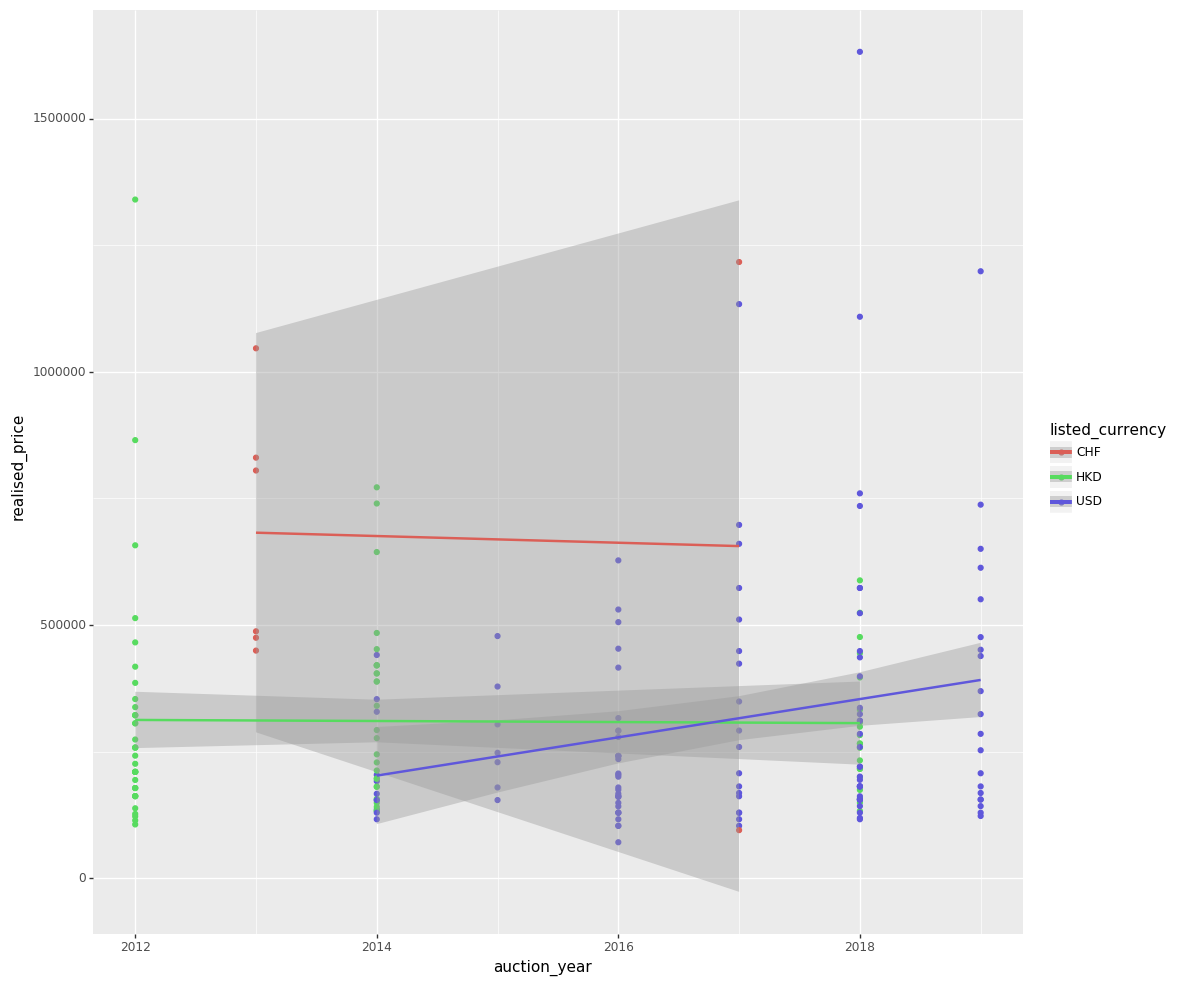

<ggplot: (-9223371919298691700)>

In [102]:
(ggplot(content[content['UltraHighEnd'] == 1], aes('auction_year','realised_price',color='listed_currency'))
       + geom_point()
       #+ facet_wrap('~listed_currency')
        + stat_smooth(method='lm'))

C:\Users\cltng\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


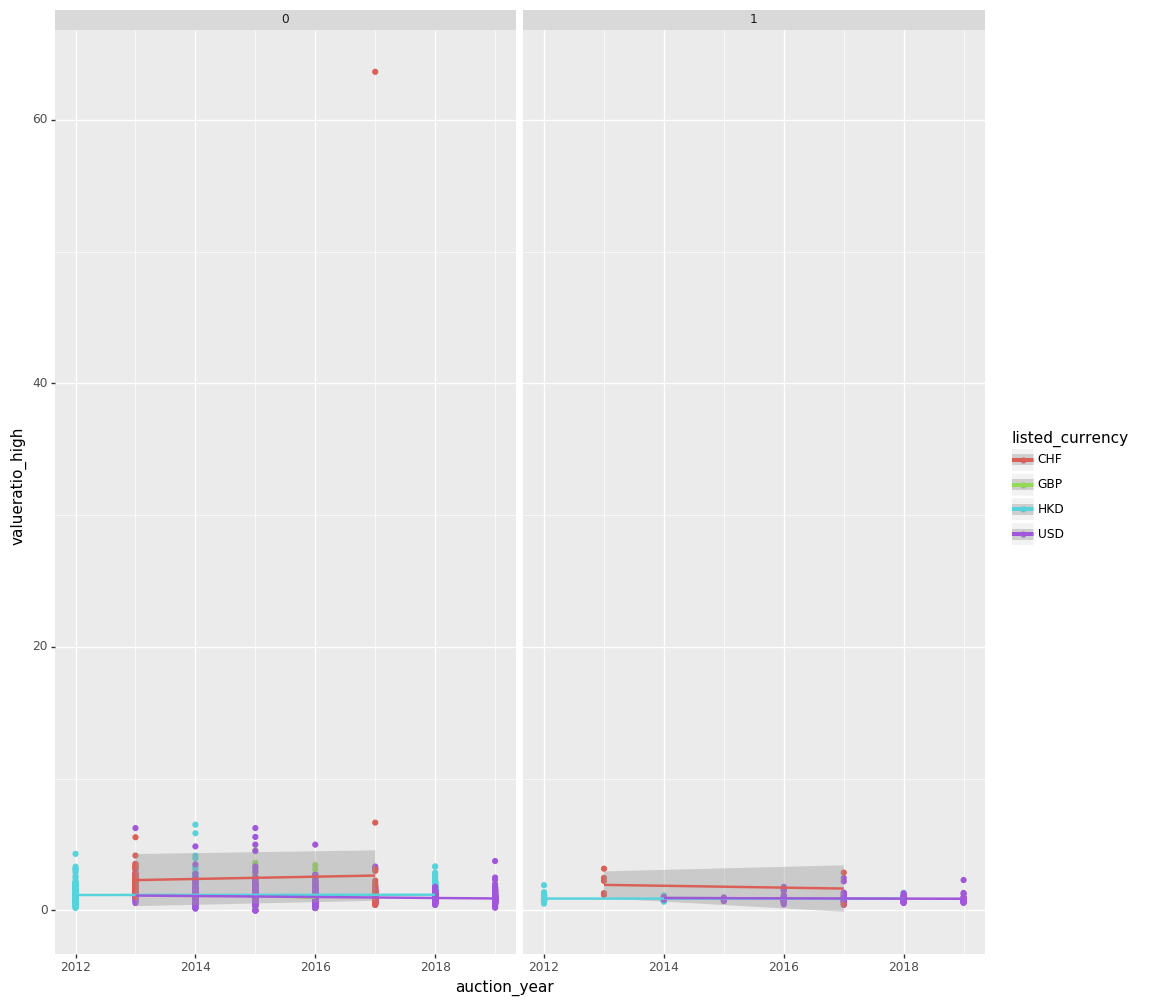

<ggplot: (-9223371919298685660)>

In [104]:
(ggplot(content, aes('auction_year','valueratio_high',color='listed_currency'))
       + geom_point()
       + facet_wrap('~UltraHighEnd')
        + stat_smooth(method='lm'))

In [105]:
# interestingly there is an auction which sold for 60x the high estimate

In [110]:
content['valueratio_high'].max()

63.64461247637051

In [114]:
#Get the row with the highest value for a given column

content.iloc[content['valueratio_high'].argmax(),]

C:\Users\cltng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


author             TUDOR\nTUDOR BLACK BAY BRONZE ONE\nDESPITE THE...
title               THE BLACK BAY BRONZE ONE MODEL PAYS IT UNIQUE...
publisher                                                       \n\n
remainder                                                           
remainder2                                                          
listed_currency                                                  CHF
realised_price                                                370348
estimated_price                                CHF 4,500 - CHF 5,500
estimate_low                                                    4761
estimate_high                                                   5819
date_of_auction                                     11 November 2017
auction_year                                                    2017
Lot_description    [TUDOR, TUDOR BLACK BAY BRONZE ONE, DESPITE TH...
auction_title                                        Only Watch 2017
image_url          [[https://www.c

In [115]:
content.iloc[content['valueratio_high'].argmax(),]['url_link']

C:\Users\cltng\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'https://www.christies.com/lotfinder/watches/tudor-tudor-black-bay-bronze-one-6095462-details.aspx?from=salesummery&intobjectid=6095462&sid=e87c8f55-4df6-4460-b376-df131dd13e03'

In [119]:
content.iloc[-(content['valueratio_high'].argmax()),]

C:\Users\cltng\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


author                                                Patek Philippe
title               A Fine 18k Gold Openface Keyless Lever Chrono...
publisher                                                           
remainder                                                           
remainder2                                                          
listed_currency                                                  USD
realised_price                                                 11674
estimated_price                                USD 7,000 - USD 9,000
estimate_low                                                    7264
estimate_high                                                   9339
date_of_auction                                      9 December 2014
auction_year                                                    2014
Lot_description    [Patek Philippe. A Fine 18k Gold Openface Keyl...
auction_title                                      Important Watches
image_url          [[https://www.c

C:\Users\cltng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """
C:\Users\cltng\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


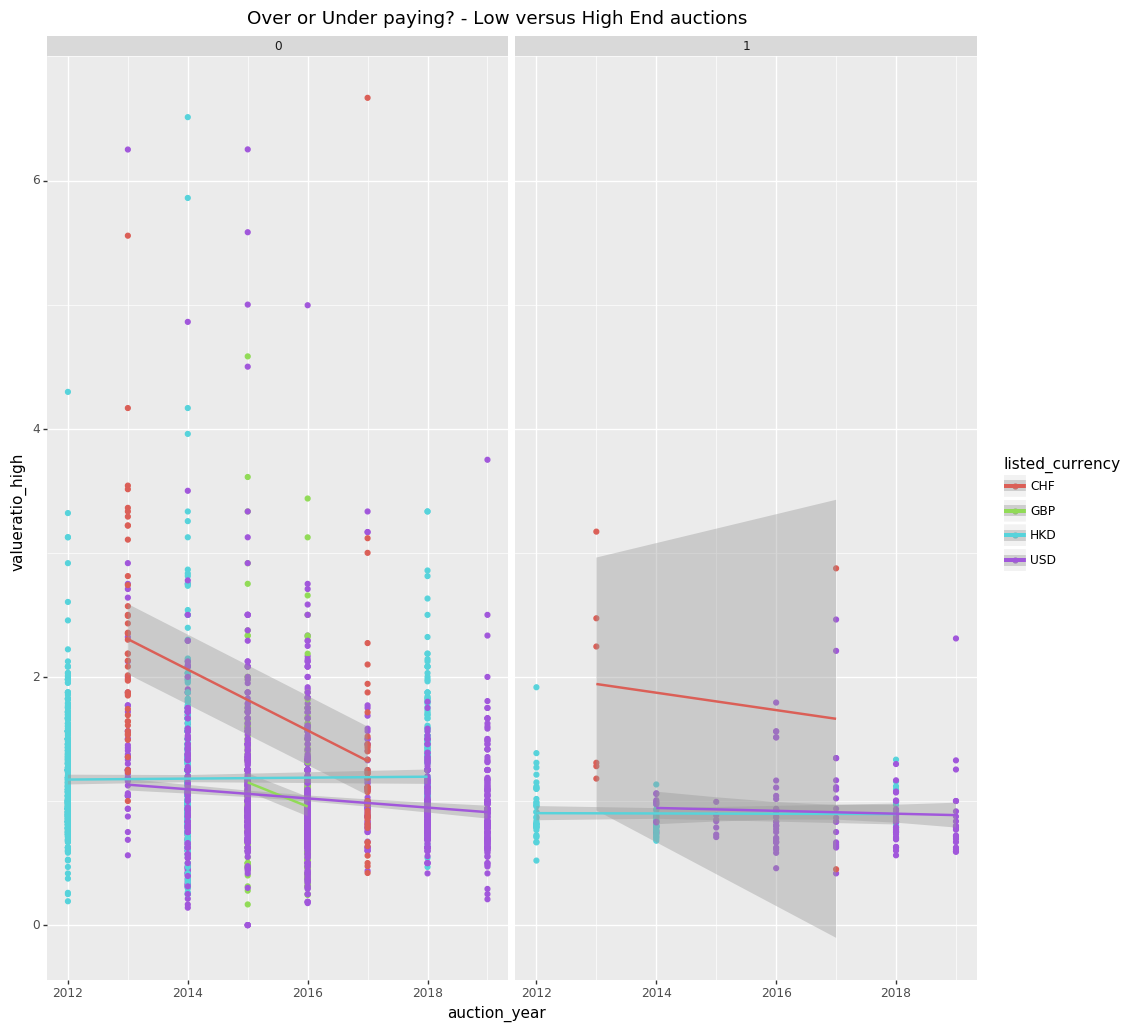

<ggplot: (-9223371919296196448)>

In [133]:
(ggplot(content.iloc[np.setdiff1d(content.index, content['valueratio_high'].argmax())], aes('auction_year','valueratio_high',color='listed_currency'))
       + geom_point()
       + facet_wrap('~UltraHighEnd')
        + stat_smooth(method='lm')
        + plotnine.ggtitle('Over or Under paying? - Low versus High End auctions'))

In [131]:
# While watches may have sold for higher prices in recent years, they have remained consistent in the price paid versus estimated high price. This is the same for 
# watches valued above and below $100,000

#Lower end watches (under $100,000) are more likely to be sold for less than the high_estimated price as seen in the 0-facet, purple line.

In [135]:
content[content['valueratio_low'] < 1].describe()

,realised_price,estimate_low,estimate_high,auction_year,valueratio_high,valueratio_low,UltraHighEnd
count,298.00,298.00,298.00,298.00,298.00,298.00,298.00
mean,8213.60,10417.95,16626.59,2015.32,0.48,0.71,0.02
std,22777.62,26470.37,47734.48,1.54,0.15,0.20,0.13
min,0.00,541.00,676.00,2012.00,0.00,0.00,0.00
25%,1426.00,2075.00,3133.25,2014.00,0.39,0.62,0.00
50%,2594.00,4150.00,6038.50,2016.00,0.47,0.75,0.00
75%,5188.00,7439.00,11579.25,2016.00,0.60,0.88,0.00
max,259433.00,311320.00,622640.00,2019.00,0.89,0.99,1.00


In [137]:
### Only about 300 auctions were sold for less than the low_esimate. *including items not sold*

In [136]:
content[content['valueratio_low'] > 1].describe()

,realised_price,estimate_low,estimate_high,auction_year,valueratio_high,valueratio_low,UltraHighEnd
count,3.28e+03,3.28e+03,3.28e+03,3279.00,3279.00,3279.00,3279.00
mean,4.82e+04,2.93e+04,4.66e+04,2015.16,1.18,1.80,0.06
std,1.03e+05,6.39e+04,1.07e+05,2.03,1.21,1.58,0.24
min,6.76e+02,5.18e+02,7.43e+02,2012.00,0.53,1.01,0.00
25%,7.99e+03,4.33e+03,6.66e+03,2014.00,0.83,1.25,0.00
50%,1.95e+04,1.06e+04,1.60e+04,2015.00,1.00,1.50,0.00
75%,4.15e+04,2.59e+04,4.15e+04,2016.00,1.32,2.00,0.00
max,1.63e+06,1.04e+06,2.08e+06,2019.00,63.64,77.79,1.00
